## Constraint Programming for the departure delay only model ##

In [1]:
import sys
sys.path.append('../../qubo')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import instance
import Numberjack as nj

In [3]:
deltat = 3

In [4]:
inst = instance.Instance('../data/instances/atm_instance_partition0046_delayStep006_maxDelay018.h5')

In [5]:
Nf = len(inst.flights)
Nk = len(inst.conflicts)
print Nf, Nk

64 261


In [6]:
Nd = len(inst.delays)
delayStep = inst.delays[1] - inst.delays[0]
# check if delays were equidistant
assert(all(np.array(inst.delays) / delayStep == np.arange(Nd)))

In [7]:
18./6

3.0

In [8]:
maxDelay = 18
Nd = 6
delayStep = float(maxDelay)/Nd

In [9]:
d = nj.VarArray(Nf, Nd)

In [10]:
model = nj.Model()
model += nj.Minimise(nj.Sum(d))
for k in range(Nk):
    dtmin = int(inst.timeLimits[k][0])
    dtmax = int(inst.timeLimits[k][0])
    f1 = int(inst.conflicts[k][0])
    f2 = int(inst.conflicts[k][1])
    i = int(inst.flights.index(f1))
    j = int(inst.flights.index(f2))
    constraint1 = maxDelay * (d[i] - d[j]) >= Nd * (deltat - dtmin)
    constraint2 = maxDelay * (d[i] - d[j]) <= - Nd * (deltat + dtmax)
    model += nj.Disjunction([constraint1, constraint2])

In [11]:
solver = model.load("CPLEX")
solver.setVerbosity(1)

In [ ]:
solver.solve()

In [13]:
sol = solver

In [14]:
s = d.solution()
solution = [int(i) for i in s.strip("[]").split(', ')]

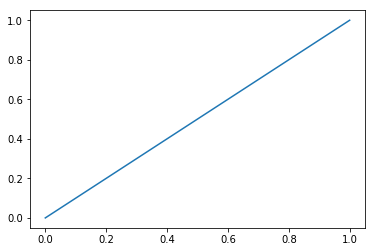

In [15]:
%matplotlib inline
plt.plot(solution);

In [16]:
totaldelay = 0
for k in range(Nf):
    totaldelay += solution[k]
print "Total delay =", totaldelay

Total delay = 1


In [17]:
allvalid = []
for k in range(Nk):
    dtmin = int(inst.timeLimits[k][0])
    dtmax = int(inst.timeLimits[k][0])
    f1 = int(inst.conflicts[k][0])
    f2 = int(inst.conflicts[k][1])
    i = int(inst.flights.index(f1))
    j = int(inst.flights.index(f2))
    diff = delayStep * (solution[i] - solution[j]) 
    constraint1 = delayStep * (solution[i] - solution[j]) >= deltat - dtmin
    constraint2 = delayStep * (solution[i] - solution[j]) <= - deltat - dtmax
    valid = True if (constraint1 or constraint2) else False
    if not valid:
        print  deltat - dtmin, "<", diff, " or ", diff, "<", -deltat - dtmax, valid, "( dtmin =", dtmin, "dtmax =", dtmax, ")"
print "All valid = ", all(allvalid)


All valid =  True


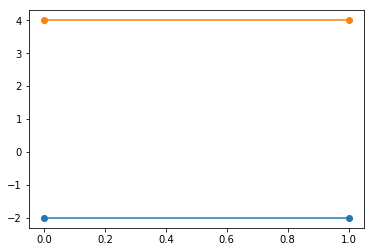

In [18]:
plt.plot(np.array(inst.timeLimits)[:,0], 'o-')
plt.plot(np.array(inst.timeLimits)[:,1], 'o-');

## Continuous delays ##

In [19]:
deltat = 3.0

In [20]:
Nf = len(inst.flights)
Nk = len(inst.conflicts)
print Nf, Nk

2 2


In [52]:
maxDelay = 2

In [47]:
d = nj.VarArray(Nf, 0.0, maxDelay)

In [48]:
model = nj.Model()
model += nj.Minimise(nj.Sum(d))
for k in range(Nk):
    dtmin = int(inst.timeLimits[k][0])
    dtmax = int(inst.timeLimits[k][0])
    f1 = int(inst.conflicts[k][0])
    f2 = int(inst.conflicts[k][1])
    i = int(inst.flights.index(f1))
    j = int(inst.flights.index(f2))
    constraint1 = (d[i] - d[j]) > (deltat - dtmin)
    constraint2 = (d[i] - d[j]) < - (deltat + dtmax)
    model += nj.Disjunction([constraint1, constraint2])

In [49]:
solver = model.load("CPLEX")
solver.setVerbosity(1)

In [50]:
solver.solve()

False

In [51]:
s = d.solution()
solution = [float(i) for i in s.strip("[]").split(', ')]

ValueError: could not convert string to float: None

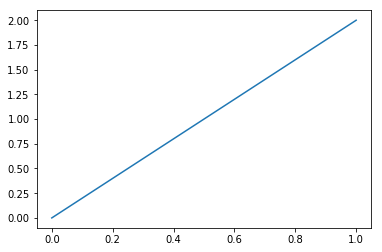

In [45]:
%matplotlib inline
plt.plot(solution);

In [37]:
totaldelay = 0
for k in range(Nf):
    totaldelay += solution[k]
print "Total delay =", totaldelay

Total delay = 2.0


In [38]:
allvalid = []
for k in range(Nk):
    dtmin = int(inst.timeLimits[k][0])
    dtmax = int(inst.timeLimits[k][0])
    f1 = int(inst.conflicts[k][0])
    f2 = int(inst.conflicts[k][1])
    i = int(inst.flights.index(f1))
    j = int(inst.flights.index(f2))
    diff = (solution[i] - solution[j]) 
    constraint1 = (solution[i] - solution[j]) >= deltat - dtmin
    constraint2 = (solution[i] - solution[j]) <= - deltat - dtmax
    valid = True if (constraint1 or constraint2) else False
    if not valid:
        print  deltat - dtmin, "<", diff, " or ", diff, "<", -deltat - dtmax, valid, "( dtmin =", dtmin, "dtmax =", dtmax, ")"
print "All valid = ", all(allvalid)


All valid =  True
